In [1]:
# Load data
import pandas as pd
filename='Boston_housing.csv'
names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
dataset=pd.read_csv(filename,delim_whitespace=True,names=names)

In [2]:
# Shape
print(dataset.shape)

(506, 14)


In [3]:
# Head
print(dataset.head(4))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  


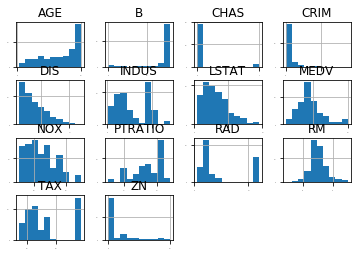

In [5]:
# Data Visualizations
# Unimodal Data Visualization
import matplotlib.pyplot as plt
dataset.hist(xlabelsize=1,ylabelsize=1)
plt.show()
# We can some of the attributes may have an exponential distribution and some have bimodal and gaussian as well.

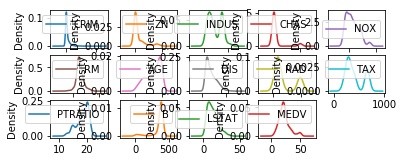

In [12]:
# Lets look at the same distribution using density plots
#density
dataset.plot(kind='density',subplots=True,layout=(5,5),sharex=False,sharey=False)
plt.show()
# Most of the distribution are in gaussian,exponential and bimodal distributions

In [13]:
# Split the dataset into input and output attribute
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
# Split input and output attributes into training and test set
train_size=0.80
test_size=0.20
seed=5
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)

linear_reg : -25.223971 (8.769171)
knn : -41.677270 (15.751727)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR : -85.946141 (17.581121)
decision_tree : -24.290151 (17.275683)
Random_forest : -10.861030 (4.472019)


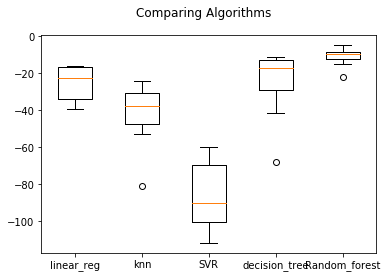

In [14]:
# Spot Checking and Comparing Algorithms
n_trees=10
models=[]
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models.append(('linear_reg',LinearRegression()))
models.append(('knn',KNeighborsRegressor()))
models.append(('SVR',SVR()))
models.append(("decision_tree",DecisionTreeRegressor()))
models.append(('Random_forest',RandomForestRegressor(n_estimators=n_trees)))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
error='neg_mean_squared_error'
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
axis=fig.add_subplot(111)
plt.boxplot(predictions)
axis.set_xticklabels(names)
plt.show()

scaler_lg : -25.223971 (8.769171)
scale_KNN : -24.495927 (11.884086)
scale_SVR : -32.657487 (15.173412)
scale_decision : -22.556151 (13.728448)
scale_forest : -12.404105 (5.134087)


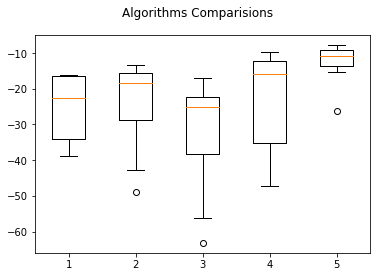

In [16]:
# Create Pipeline with Standardization Scale and models
# Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
n_trees=10
pipelines=[]
pipelines.append(('scaler_lg',Pipeline([('scaler',StandardScaler()),('lg',LinearRegression())])))
pipelines.append(('scale_KNN',Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('scale_SVR',Pipeline([('scaler',StandardScaler()),('SVR',SVR())])))
pipelines.append(('scale_decision',Pipeline([('scaler',StandardScaler()),('decision',DecisionTreeRegressor())])))
pipelines.append(('scale_forest',Pipeline([('scaler',StandardScaler()),('forest',RandomForestRegressor(n_estimators=n_trees))])))

# Evaluate Pipelines
predictions=[]
names=[]
for name, model in pipelines:
    fold=KFold(n_splits=10,random_state=5)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg='%s : %f (%f)'%(name,result.mean(),result.std())
    print(msg)
    
#Visualize the compared algorithms
fig=plt.figure()
fig.suptitle("Algorithms Comparisions")
plt.boxplot(predictions)
plt.show()

In [ ]:
# As We saw scaling did have an effort on RandomForest.
# Now we are going to use RandomForest Algorithm To predict

In [17]:
# Improve Result With Tuning
# Improve Result for Random Forest Regression algorithm.We Got More Accuracte for the dataset.

#Random Forest Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
n_trees=np.array([1,5,10,15,20,25,30,35,40,45,50])
param_grid=dict(n_estimators=n_trees)
model=RandomForestRegressor()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,std,param in zip(means,stds,params):
    print("%f (%f) with: %r"%(mean,std,param))

Best: -10.102754 using {'n_estimators': 25} 
-22.102054 (7.678364) with: {'n_estimators': 1}
-13.539680 (6.778292) with: {'n_estimators': 5}
-12.491872 (5.856083) with: {'n_estimators': 10}
-12.232277 (5.881890) with: {'n_estimators': 15}
-11.263081 (4.912097) with: {'n_estimators': 20}
-10.102754 (4.457270) with: {'n_estimators': 25}
-10.759020 (5.144435) with: {'n_estimators': 30}
-11.563164 (5.016039) with: {'n_estimators': 35}
-10.714801 (4.731942) with: {'n_estimators': 40}
-10.775369 (5.142291) with: {'n_estimators': 45}
-10.878245 (5.895300) with: {'n_estimators': 50}


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
# As per result 50 trees random forest algorithm provides the best accuracy

scaledAB : -12.179183 (4.393684)
scaledGBR : -9.326144 (3.900330)
scaledRF : -12.522795 (5.239677)
scaledETR : -10.968969 (7.177090)


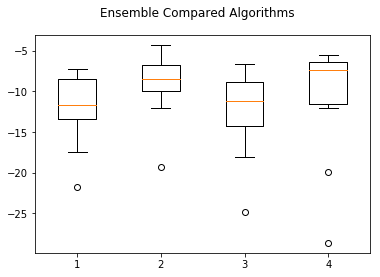

In [18]:
# Ensemble Methods
# Another Way that we can improve the performance of algorithm on this problem is by using ensemble


#Ensemble
# Boosting methods
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Bagging methods
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
ensembles=[]
ensembles.append(('scaledAB',Pipeline([('scale',StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('scaledGBR',Pipeline([('scale',StandardScaler()),('GBR',GradientBoostingRegressor())])))
ensembles.append(('scaledRF',Pipeline([('scale',StandardScaler()),('rf',RandomForestRegressor(n_estimators=10))])))
ensembles.append(('scaledETR',Pipeline([('scale',StandardScaler()),('ETR',ExtraTreesRegressor(n_estimators=10))])))

# Evaluate each Ensemble Techinique
results=[]
names=[]
for name,model in ensembles:
    fold=KFold(n_splits=10,random_state=5)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    results.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    
# Visualizing the compared Ensemble Algorithms
fig=plt.figure()
fig.suptitle('Ensemble Compared Algorithms')
plt.boxplot(results)
plt.show()

In [ ]:
# It Looks like Gradient Boosting has a better mean score and it looks like Extra Trees Regressor has
# similar distribution and perhaps a better median score

In [19]:
# Tune Ensemble Methods
# The Default number of boosting stages to perform (n_estimators) 100.
# This is a good candidate parameter of gradient boosting to tune.

# Tune Ensemble Scaled Gradient Boosting Regressor
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
n_trees=np.array([50,100,150,200,250,300,350,400])

param_grid=dict(n_estimators=n_trees)
model=GradientBoostingRegressor(random_state=5)

fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold,iid=True)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,std,param in zip(means,stds,params):
    print("%f (%f) with: %r"%(mean,std,param))

Best: -9.122916 using {'n_estimators': 200} 
-9.748131 (3.179810) with: {'n_estimators': 50}
-9.270279 (3.622643) with: {'n_estimators': 100}
-9.131280 (3.631808) with: {'n_estimators': 150}
-9.122916 (3.775800) with: {'n_estimators': 200}
-9.164405 (3.956085) with: {'n_estimators': 250}
-9.232663 (4.103036) with: {'n_estimators': 300}
-9.280014 (4.139958) with: {'n_estimators': 350}
-9.310481 (4.145377) with: {'n_estimators': 400}


In [ ]:
# We can see the Best Configuration was n_estimators=200 resulting in a mean squared error -9.122, about
# 0.13 units better than the un-tunned methods.

In [20]:
# Finalize Model
# We will finalize the gradient boosting model and evaluate it on our hold out validation dataset.

# Prepare model
from sklearn.metrics import mean_squared_error
scaler=StandardScaler().fit(x_train)
scaler_x=scaler.transform(x_train)
model=GradientBoostingRegressor(random_state=5,n_estimators=200)
model.fit(scaler_x,y_train)

#Transform the validation dataset
x_pred=scaler.transform(x_test)
y_pred=model.predict(x_pred)
print(mean_squared_error(y_test,y_pred))

9.267632829303963


In [ ]:
# We Got Mean Square Error around 9.26 as excepted was 11.23 we got pretty accuracte outcome